In [4]:
cd /home/disk2/wdd/PDZ/MSM/charm36m

/home/disk2/wdd/PDZ/MSM/charm36m


In [5]:
from msmbuilder.dataset import dataset
from msmbuilder.cluster import KCenters
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.cluster import MiniBatchKMedoids
from msmbuilder.msm import MarkovStateModel
from msmbuilder.lumping import PCCAPlus
from msmbuilder.lumping import PCCA
from msmbuilder.msm import implied_timescales
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=20)

In [3]:
xyz = dataset("./*.xtc",topology='crystal.pdb',stride=1)

In [4]:
from msmbuilder.featurizer import DihedralFeaturizer

In [5]:
featurizer = DihedralFeaturizer(types=['phi', 'psi'])

In [6]:
diheds = featurizer.fit_transform(xyz)

In [8]:
diheds[0][2]

array([-0.97682494, -0.87798351, -0.73464286, -0.78051388, -0.97749728,
       -0.21403971,  0.47869083, -0.67845404, -0.6251384 , -0.21094793,
        0.98434228,  0.82166755,  0.91542321,  0.83216888, -0.17626777,
       -0.56996703, -0.40249261, -0.55452222], dtype=float32)

In [7]:
from msmbuilder.preprocessing import RobustScaler
scaler = RobustScaler()

In [10]:
scaled_diheds = scaler.fit_transform(diheds)

In [11]:
from msmbuilder.decomposition import tICA
tica_model = tICA(lag_time=10, n_components=4)

In [12]:
tica_model = tica_model.fit(scaled_diheds)

In [13]:
tica_trajs = tica_model.transform(scaled_diheds)

In [14]:
tica_trajs[0][2]

array([ 0.20579211, -0.62422698,  0.18989587,  0.28395875])

In [14]:
clusterer = MiniBatchKMedoids(n_clusters=800, random_state=42)

In [15]:
clusterer = clusterer.fit(tica_trajs)

In [17]:
clustered_trajs = clusterer.transform(tica_trajs)

In [18]:
clustered_trajs[0]

array([419, 484, 741, ..., 443, 506, 273])

In [19]:
msm=MarkovStateModel(lag_time=50,reversible_type='mle', verbose=False)
msm.fit(clustered_trajs)
lab_fix=msm.transform(clustered_trajs,mode='fill')

In [20]:
nMacrostates = 25
lagT = 50
pcca = PCCAPlus.from_msm(msm, n_macrostates=nMacrostates)
macro_trajs = pcca.transform(lab_fix)

Optimization terminated successfully.
         Current function value: -15.668205
         Iterations: 21
         Function evaluations: 4060


In [21]:
pcca.microstate_mapping_

array([24, 20, 23, 21, 22, 19, 24, 18, 15, 17,  8, 24, 20, 24, 23, 24, 24,
       24, 18, 24, 24, 20, 24, 24, 24, 24, 24, 24, 20, 24, 24, 24, 18, 24,
       24, 24, 24, 24, 24, 24,  1, 20, 24, 24,  2, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 23, 24, 20, 24, 24, 24, 23, 24, 24, 23, 24, 24,
       24, 20, 24, 20, 16, 24, 24, 20, 24, 24, 24, 24, 24, 20, 22, 20, 20,
       24, 24, 19, 24, 24, 24,  8, 24, 18, 24, 12, 24, 24, 24, 24, 24, 24,
       24, 18, 18,  8, 20, 23, 18, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24,
       24, 24, 23, 24, 20, 24, 24, 23, 24, 24, 24, 24, 24, 24, 18, 24, 20,
       17, 24, 24, 24, 23, 24, 18, 20, 14, 24,  1, 18, 24, 24, 23, 24, 24,
       24, 18, 24, 23, 24, 24, 24, 23, 24, 24, 23, 24, 20, 24, 24, 24, 24,
       24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       18, 24, 24, 24, 17, 20, 23, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24,
       24, 19, 24, 23, 24, 24, 17, 24, 24, 14, 24, 24, 24, 24, 24, 20, 24,
       24, 24, 24, 24, 24

In [22]:
len(macro_trajs[0])

50001

In [23]:
Macromsm = MarkovStateModel(lag_time=50,ergodic_cutoff='off',reversible_type=None)
Macromsm.fit(macro_trajs)

MarkovStateModel(ergodic_cutoff='off', lag_time=50, n_timescales=None,
         prior_counts=0, reversible_type=None, sliding_window=True,
         verbose=True)

In [24]:
Macromsm.populations_

array([ 0.00266158,  0.00433294,  0.00291431,  0.00305935,  0.00394079,
        0.00501316,  0.00516234,  0.00664703,  0.01009595,  0.00750665,
        0.00765597,  0.01237715,  0.0127657 ,  0.01207153,  0.01442228,
        0.02464911,  0.02431564,  0.03307935,  0.03673192,  0.04685185,
        0.08252733,  0.05514205,  0.08156161,  0.13061382,  0.37390058])

In [35]:
fit1_chainE_xyz=dataset("./fit1_chainE.xtc",topology='crystal.pdb',stride=1)

In [36]:
fit1_chainE_diheds = featurizer.fit_transform(fit1_chainE_xyz)

In [37]:
fit1_chainE_diheds[0][2]

array([-0.97910911, -0.88761503, -0.96159744, -0.92466617, -0.94212222,
       -0.20333545,  0.46058613, -0.27446374,  0.38077882, -0.33526957,
        0.68089902,  0.57336277,  0.81480128,  0.83423227, -0.73237729,
       -0.81930161, -0.57974041, -0.55141318], dtype=float32)

In [38]:
fit1_chainE_scaled_diheds = scaler.fit_transform(fit1_chainE_diheds)

In [39]:
fit1_chainE_tica_trajs = tica_model.transform(fit1_chainE_scaled_diheds)

In [40]:
fit1_chainE_tica_trajs

[array([[ 0.39943058, -1.04832399, -0.02457541,  0.06368623],
        [ 0.46758617, -1.04812208,  0.16416289,  0.08165438],
        [ 0.34465809, -0.804272  , -0.41550037,  0.09040221],
        ..., 
        [ 0.30097136, -0.76594615,  0.00236361,  0.05956182],
        [ 0.35112107, -0.79577338,  0.10189516, -0.06835497],
        [ 0.32368763, -0.86352715,  0.19770047, -0.03647453]])]

In [41]:
fit1_chainE_clustered_trajs = clusterer.transform(fit1_chainE_tica_trajs)

In [43]:
fit1_chainE_clustered_trajs

[array([421, 653, 684, ...,  77, 289,  70])]

In [44]:
fit1_chainE_macro_trajs = pcca.transform(fit1_chainE_clustered_trajs)

In [47]:
wf=open('fit1_chainE_macro_trajs.dat','w')
for i in fit1_chainE_macro_trajs[0]:
    wf.write(str(i)+'\n')
wf.close()

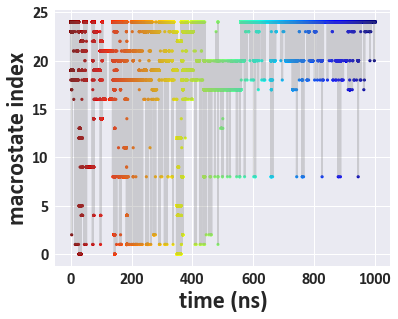

In [51]:
time_step=0.01       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
cmap = plt.cm.get_cmap("jet_r")
for nt in [1]:
#for nt in [1]:
    fig, ax = plt.subplots(figsize=(6,4.7))
    i=8
    data = np.loadtxt('fit'+str(nt)+'_chainE_macro_trajs.dat')
    #dist = data[:,0]
    time = np.arange(len(data))*time_step
    ax.scatter(time,data, c=np.arange(len(data)),cmap=cmap,lw = 0,s=10)
    ax.plot(time,data,'gray',alpha=0.3)
        #ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
    ax.set_ylabel('macrostate index',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    #plt.ylim(-0.01,0.41)
    #plt.xlim(0,1000)
    #ax.set_xticks(np.linspace(0,1200,7))
    #ax.set_xticklabels([0,200,400,600,800,1000])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig("fit"+str(nt)+"_chainE_macro_trajs"+".png",dpi=600,bbox_inches='tight')
    plt.show()

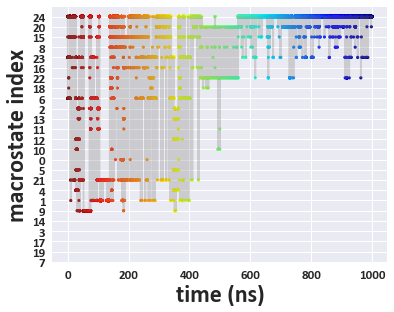

In [63]:
map_mfpt=[7,19,17,3,14,9,1,4,21,5,0,10,12,11,13,2,6,18,22,16,23,8,15,20,24]
time_step=0.01       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
cmap = plt.cm.get_cmap("jet_r")
for nt in [1]:
#for nt in [1]:
    fig, ax = plt.subplots(figsize=(6,4.7))
    i=8
    data = np.loadtxt('fit'+str(nt)+'_chainE_macro_trajs.dat')
    data_sort=[]
    for m in data:
        data_sort.append(map_mfpt[int(m)])
    time = np.arange(len(data))*time_step
    ax.scatter(time,data_sort, c=np.arange(len(data)),cmap=cmap,lw = 0,s=10)
    ax.plot(time,data_sort,'gray',alpha=0.3)
        #ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
    ax.set_ylabel('macrostate index',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    plt.ylim(0,25)
    #plt.xlim(0,1000)
    ax.set_yticks(np.linspace(0,25,26))
    ax.set_yticklabels(map_mfpt)
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(13)
    plt.savefig("fit"+str(nt)+"_chainE_macro_trajs_mfpt_sort"+".png",dpi=600,bbox_inches='tight')
    plt.show()

In [25]:
pwd

u'/home/disk2/wdd/PDZ/MSM/charm36m'

fit54_skip10_chain1


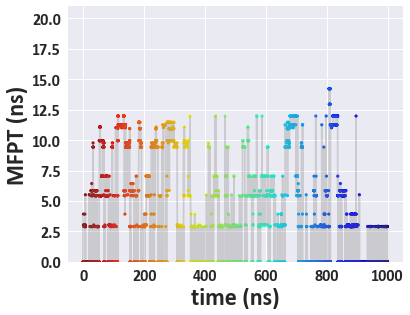

fit54_skip10_chain2


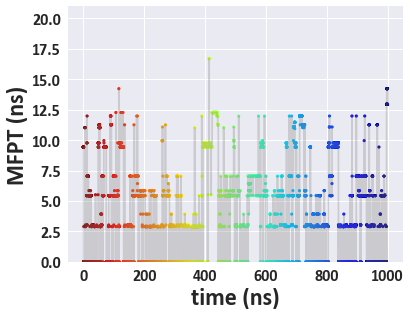

fit54_skip10_chain3


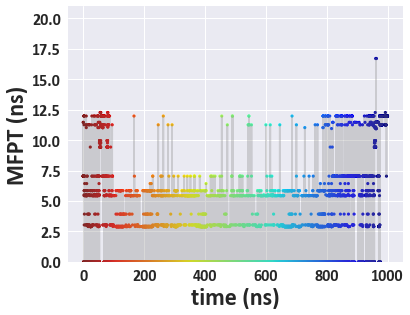

fit54_skip10_chain4


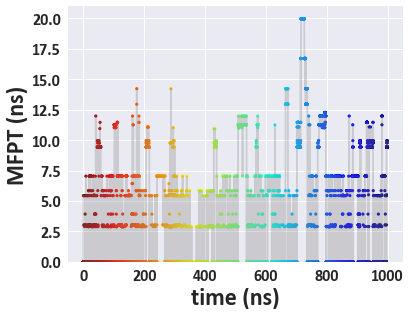

fit54_skip10_chain5


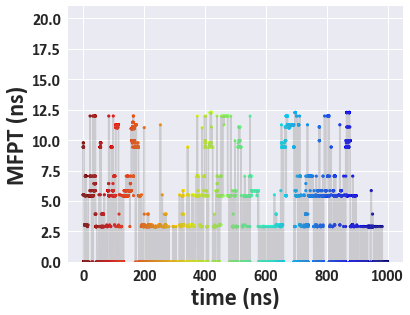

fit54_skip10_chain6


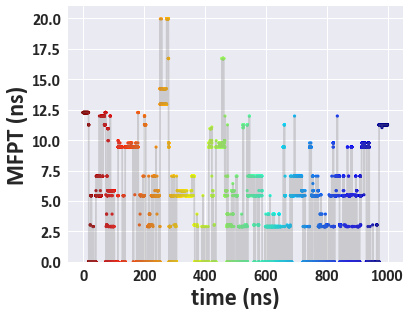

fit54_skip10_chain7


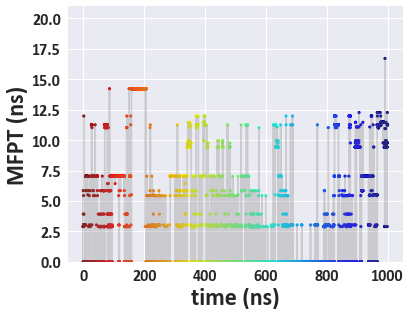

fit54_skip10_chain8


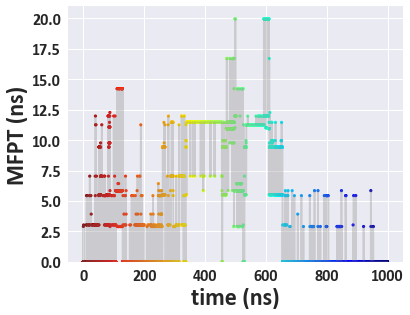

fit54_skip10_chain9


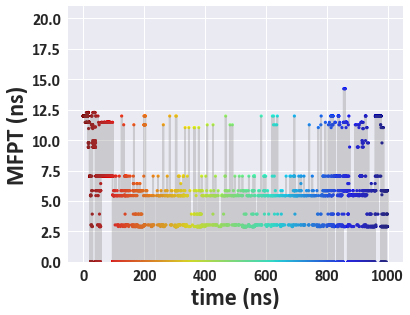

fit54_skip10_chain10


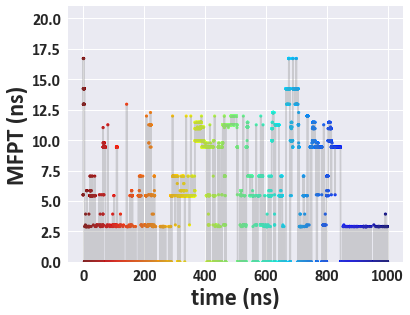

fit54_skip10_chain11


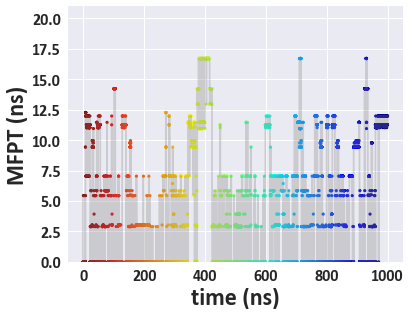

fit54_skip10_chain12


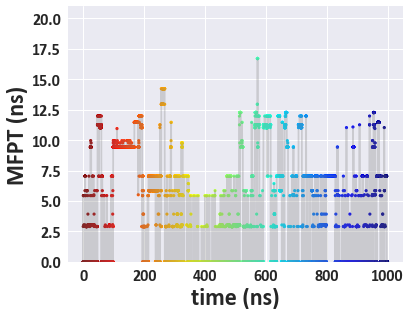

fit55_skip10_chain1


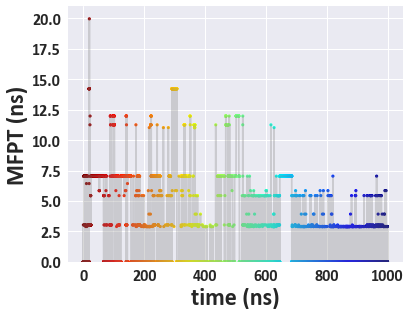

fit55_skip10_chain2


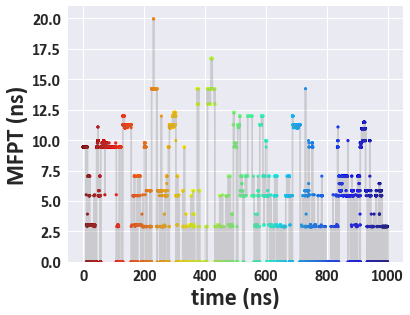

fit55_skip10_chain3


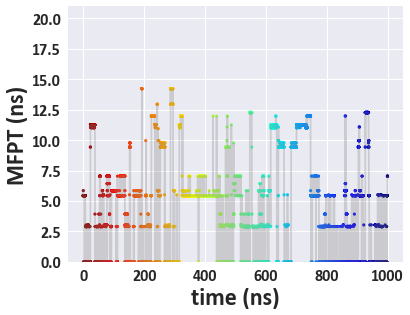

fit55_skip10_chain4


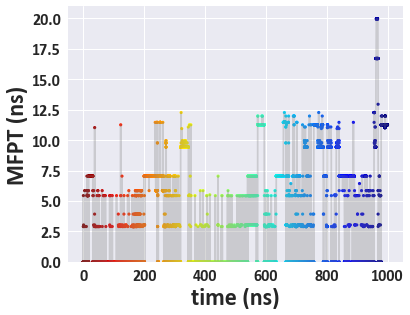

fit55_skip10_chain5


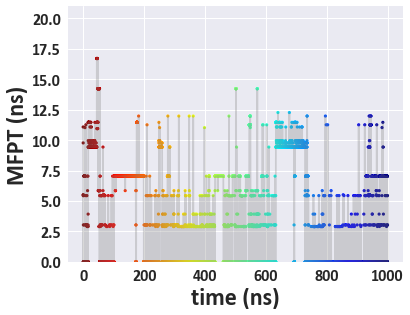

fit55_skip10_chain6


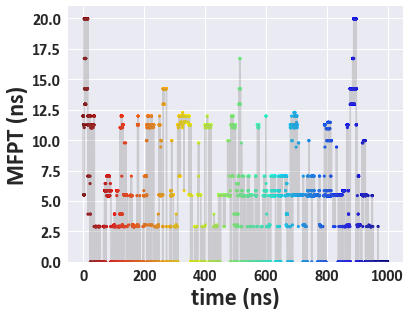

fit55_skip10_chain7


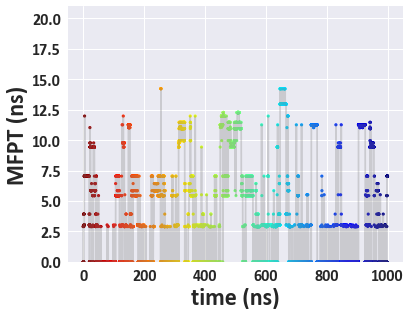

fit55_skip10_chain8


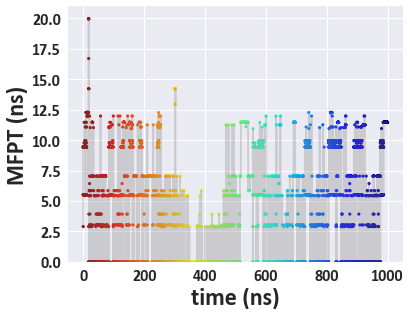

fit55_skip10_chain9


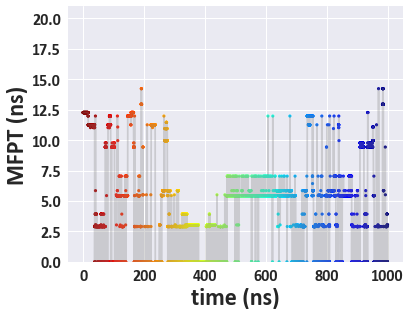

fit55_skip10_chain10


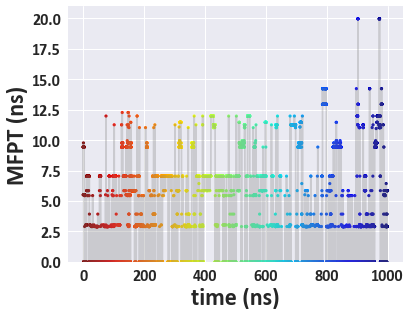

fit55_skip10_chain11


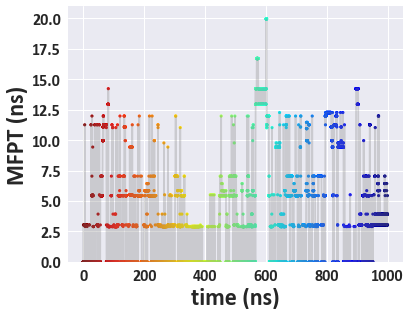

fit55_skip10_chain12


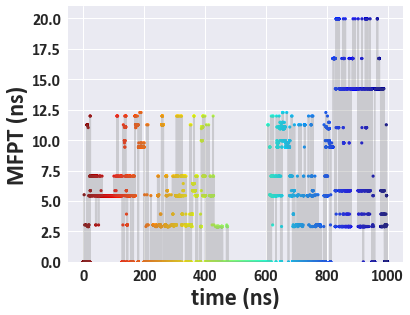

fit56_skip10_chain1


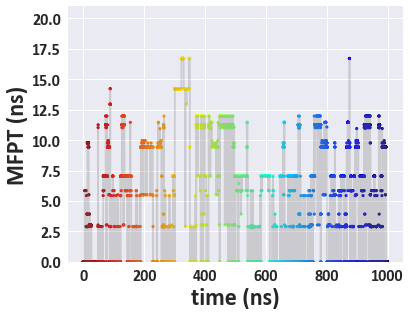

fit56_skip10_chain2


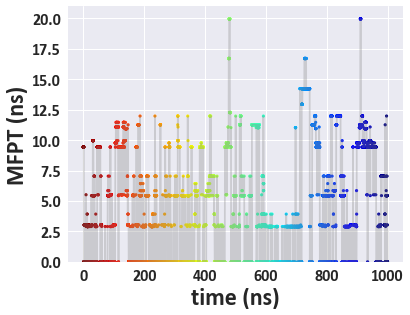

fit56_skip10_chain3


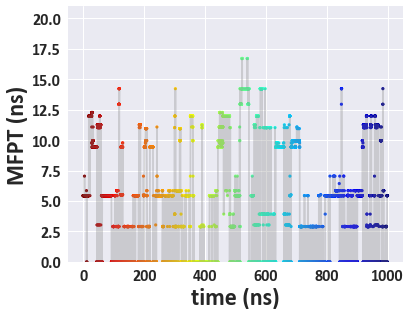

fit56_skip10_chain4


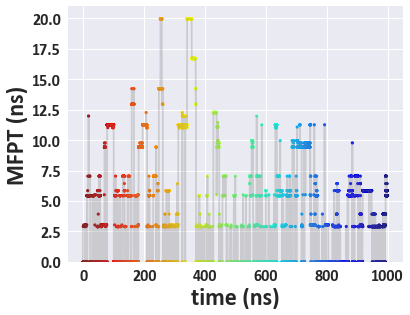

fit56_skip10_chain5


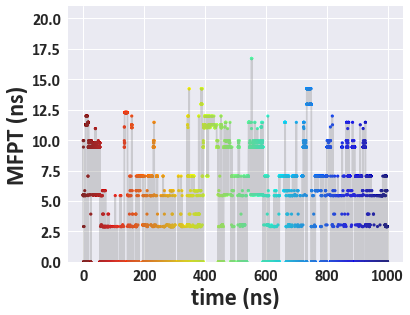

fit56_skip10_chain6


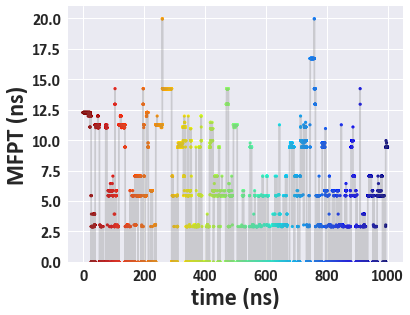

fit56_skip10_chain7


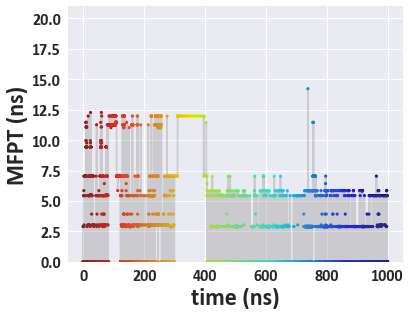

fit56_skip10_chain8


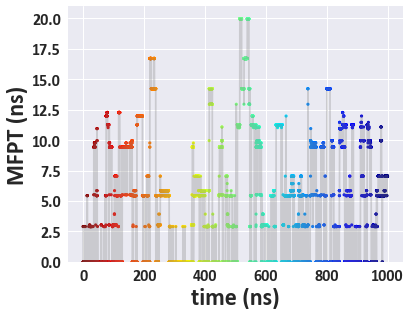

fit56_skip10_chain9


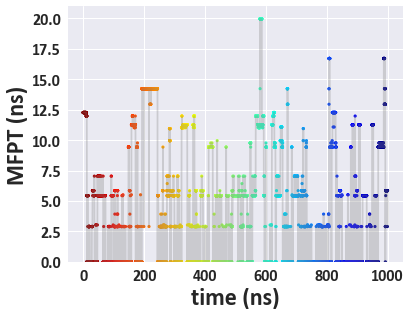

fit56_skip10_chain10


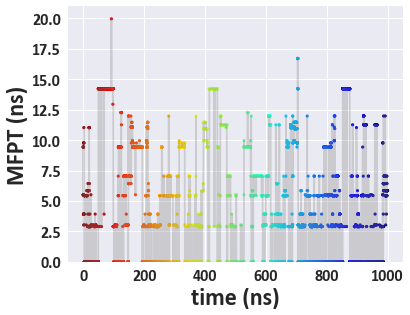

fit56_skip10_chain11


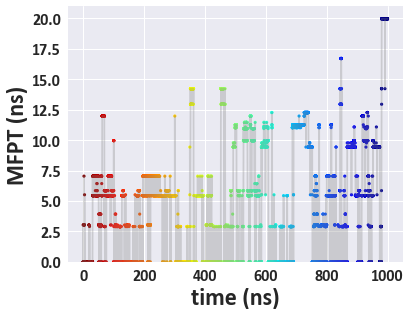

fit56_skip10_chain12


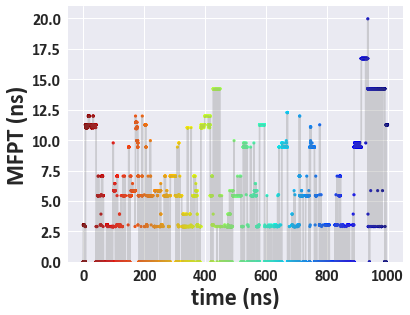

fit57_skip10_chain1


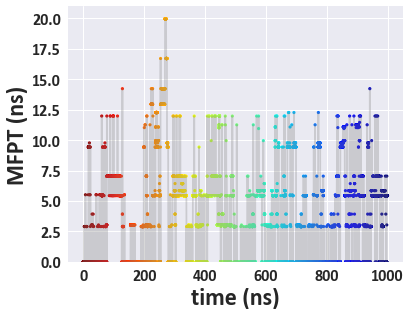

fit57_skip10_chain2


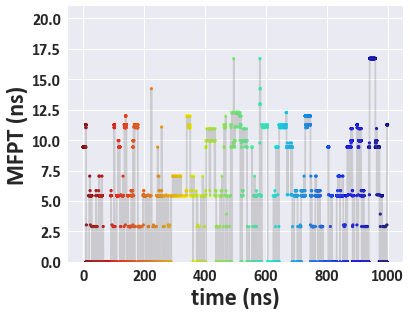

fit57_skip10_chain3


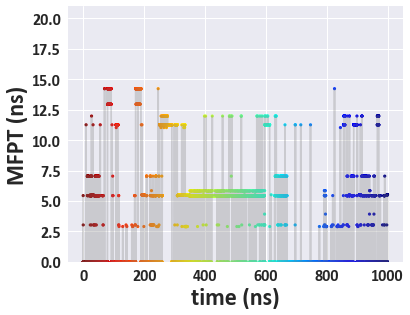

fit57_skip10_chain4


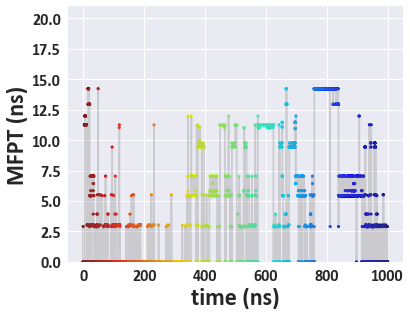

fit57_skip10_chain5


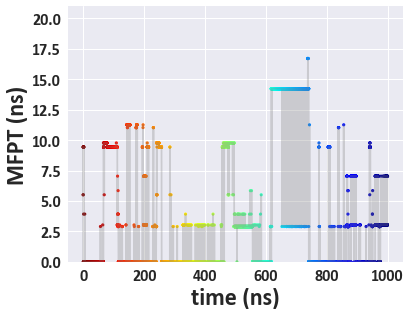

fit57_skip10_chain6


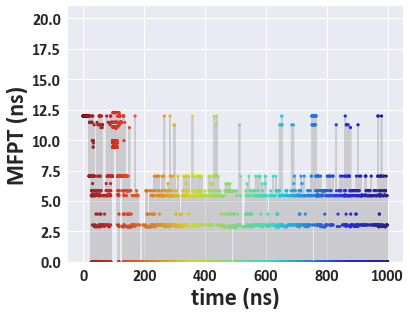

fit57_skip10_chain7


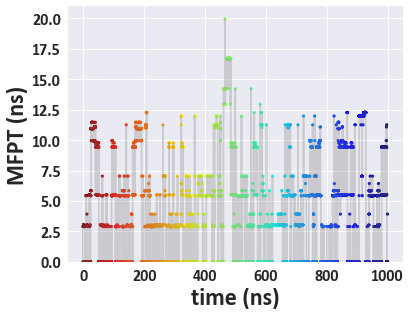

fit57_skip10_chain8


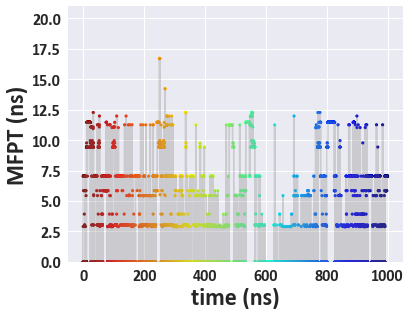

fit57_skip10_chain9


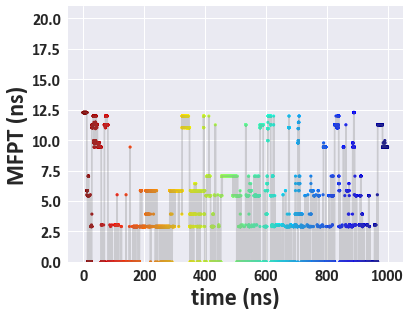

fit57_skip10_chain10


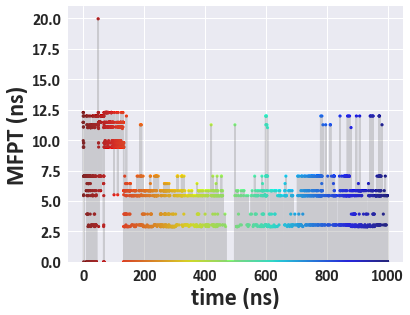

fit57_skip10_chain11


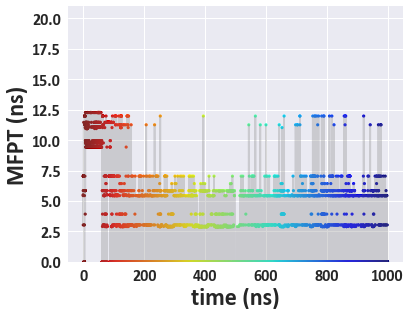

fit57_skip10_chain12


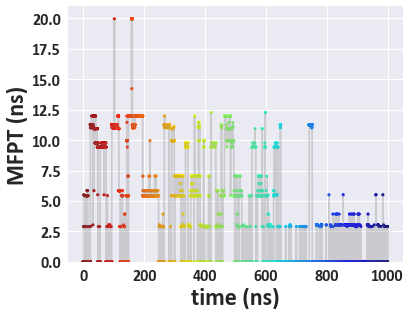

fit58_skip10_chain1


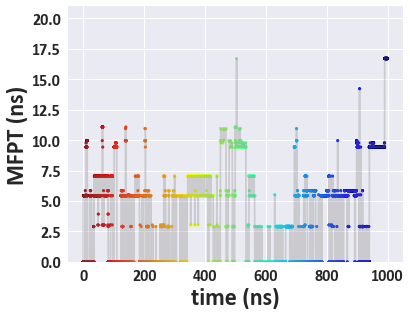

fit58_skip10_chain2


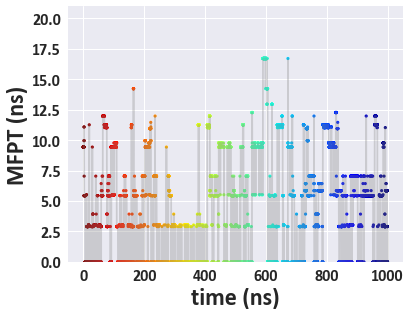

fit58_skip10_chain3


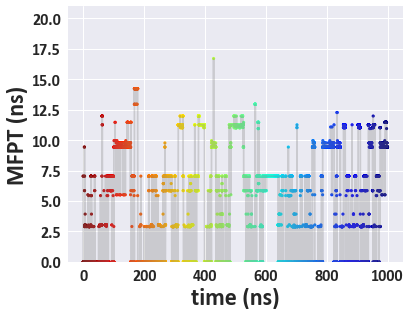

fit58_skip10_chain4


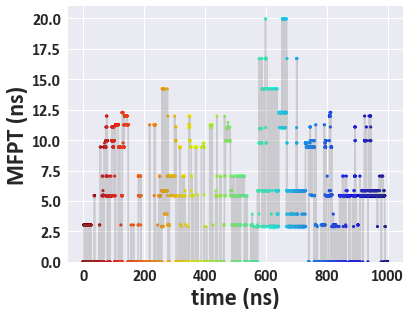

fit58_skip10_chain5


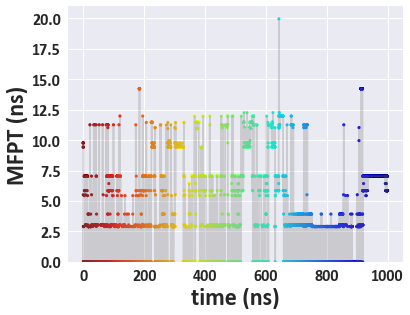

fit58_skip10_chain6


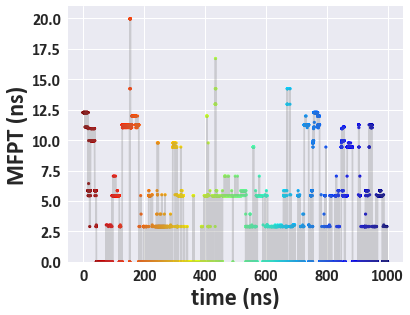

fit58_skip10_chain7


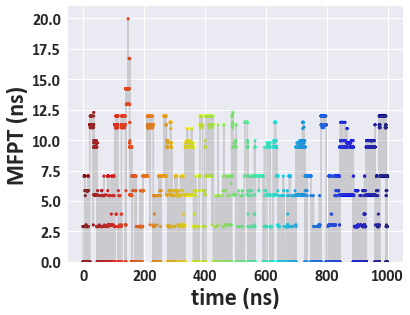

fit58_skip10_chain8


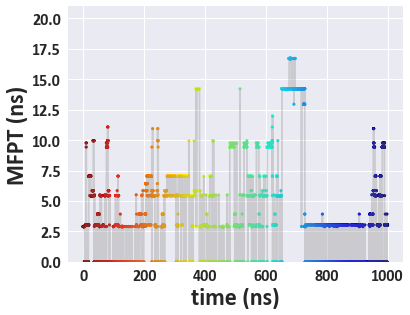

fit58_skip10_chain9


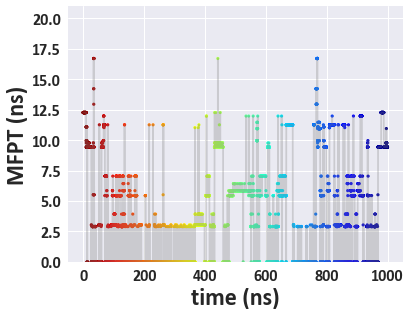

fit58_skip10_chain10


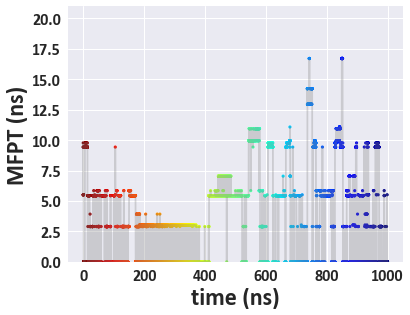

fit58_skip10_chain11


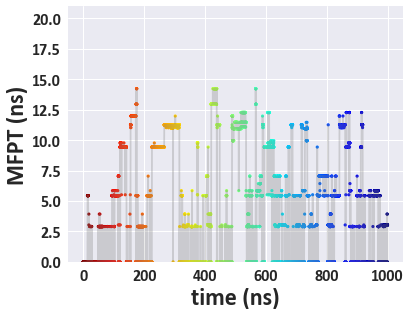

fit58_skip10_chain12


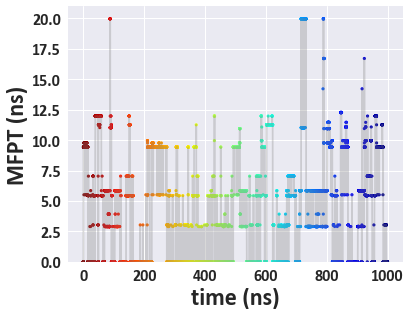

fit59_skip10_chain1


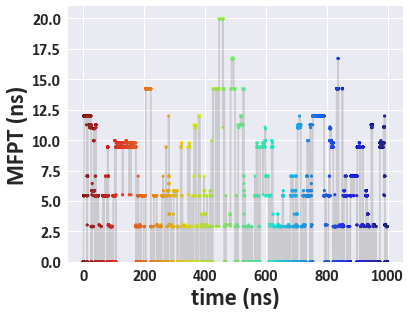

fit59_skip10_chain2


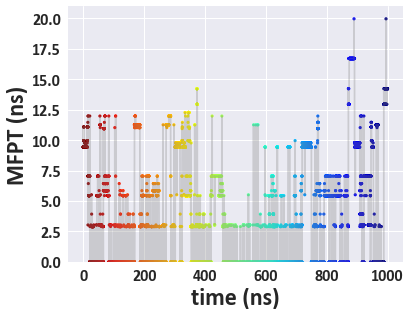

fit59_skip10_chain3


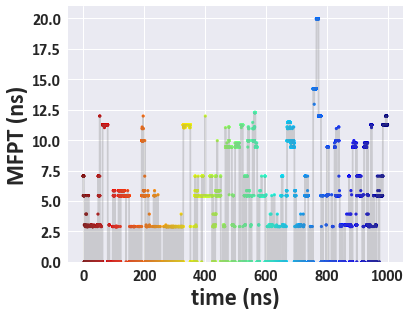

fit59_skip10_chain4


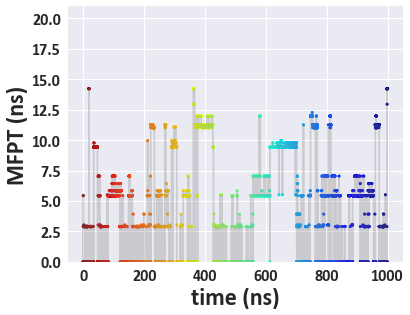

fit59_skip10_chain5


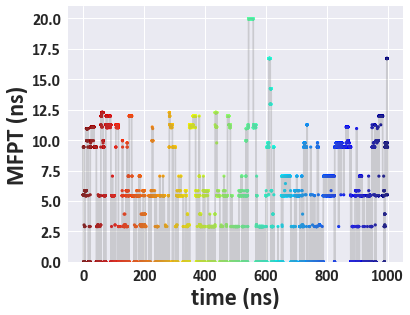

fit59_skip10_chain6


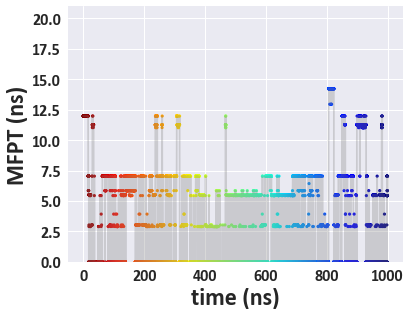

fit59_skip10_chain7


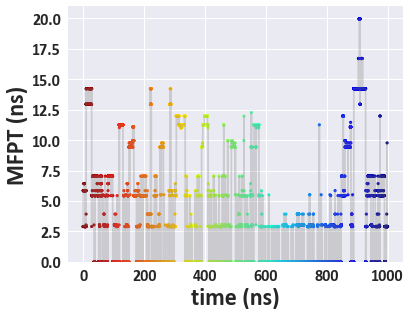

fit59_skip10_chain8


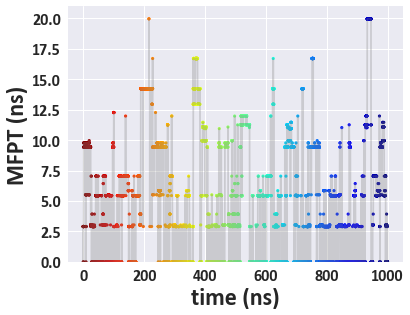

fit59_skip10_chain9


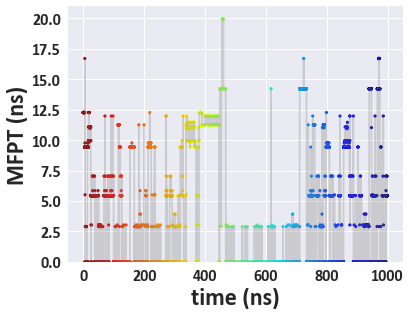

fit59_skip10_chain10


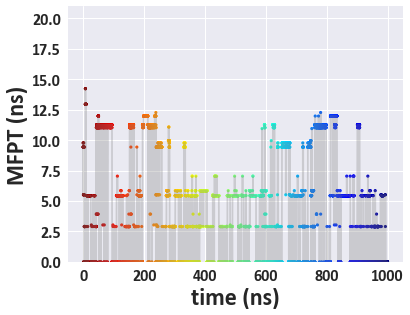

fit59_skip10_chain11


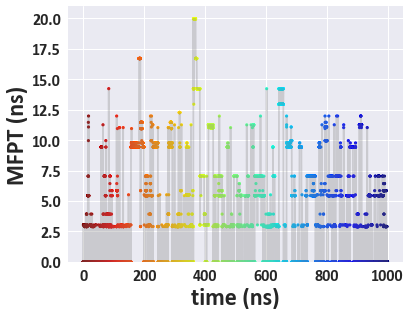

fit59_skip10_chain12


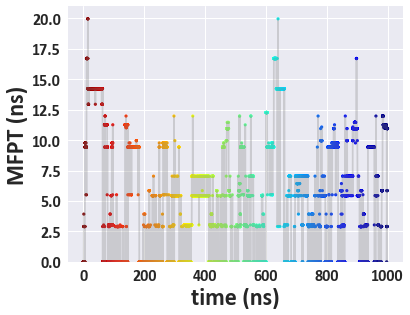

fit60_skip10_chain1


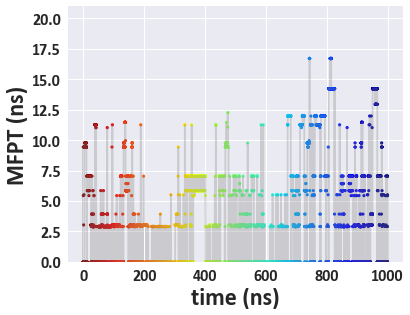

fit60_skip10_chain2


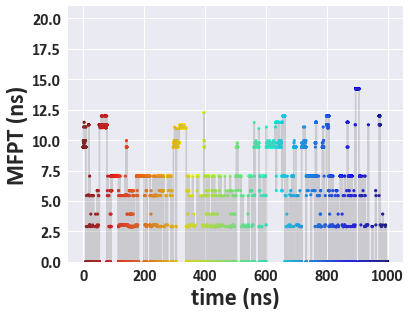

fit60_skip10_chain3


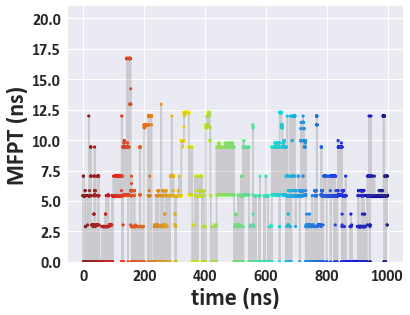

fit60_skip10_chain4


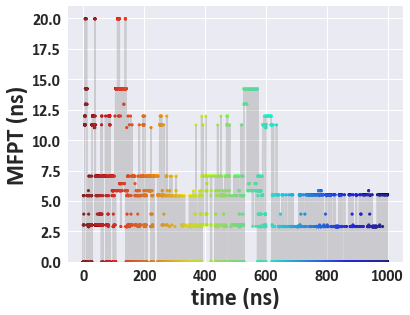

fit60_skip10_chain5


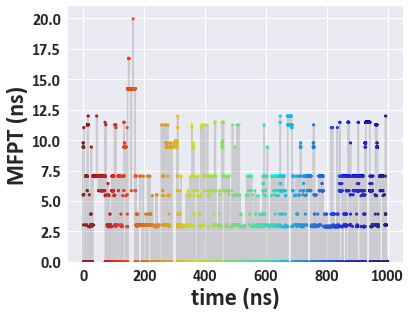

fit60_skip10_chain6


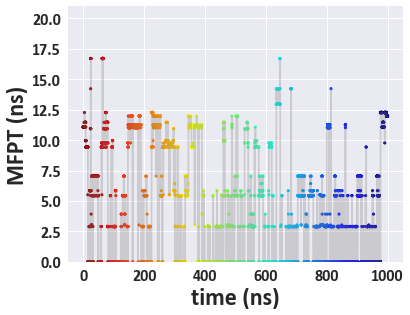

fit60_skip10_chain7


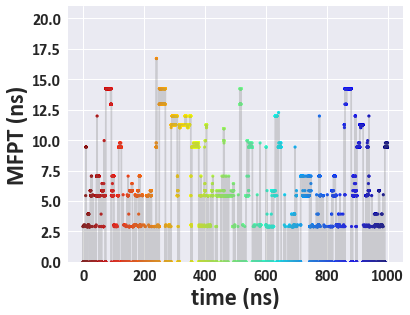

fit60_skip10_chain8


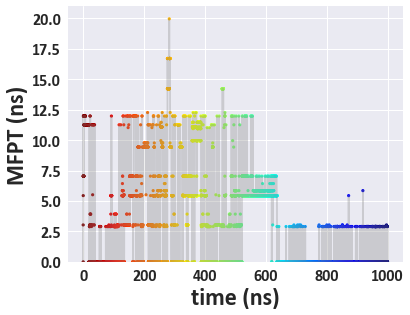

fit60_skip10_chain9


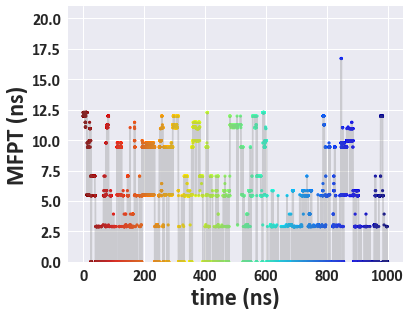

fit60_skip10_chain10


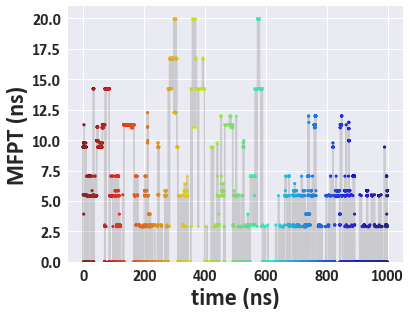

fit60_skip10_chain11


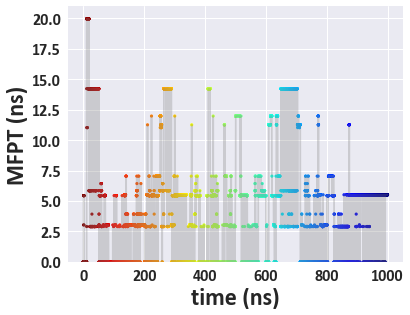

fit60_skip10_chain12


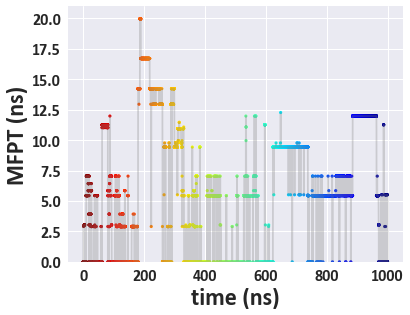

fit61_skip10_chain1


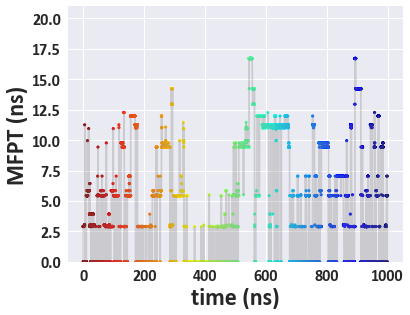

fit61_skip10_chain2


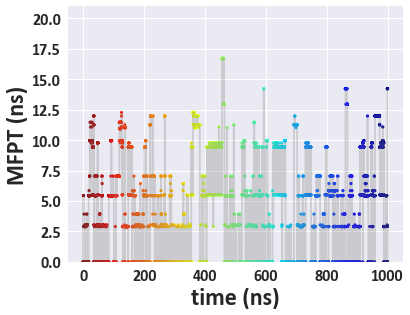

fit61_skip10_chain3


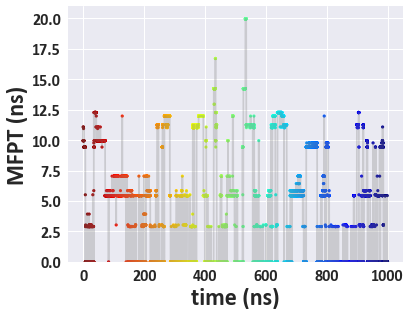

fit61_skip10_chain4


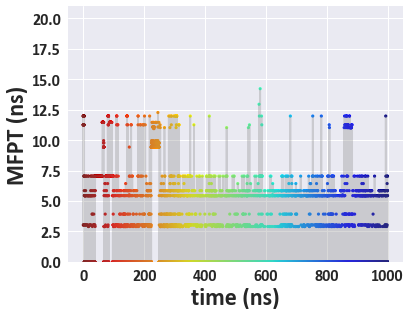

fit61_skip10_chain5


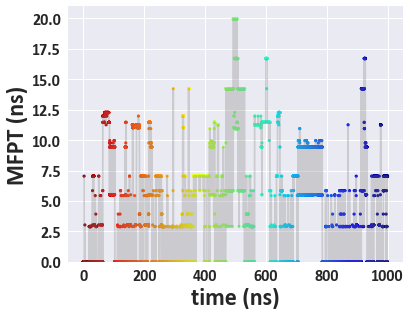

fit61_skip10_chain6


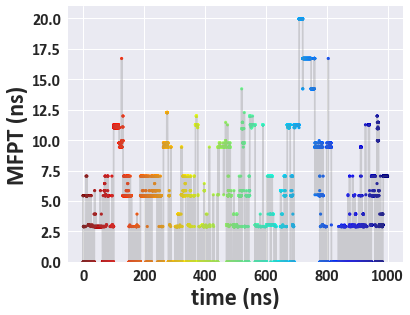

fit61_skip10_chain7


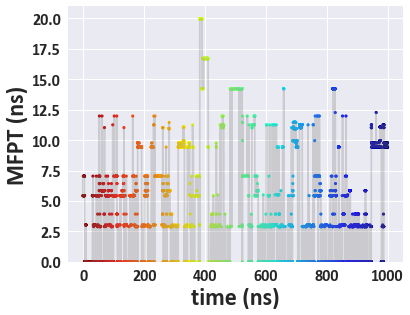

fit61_skip10_chain8


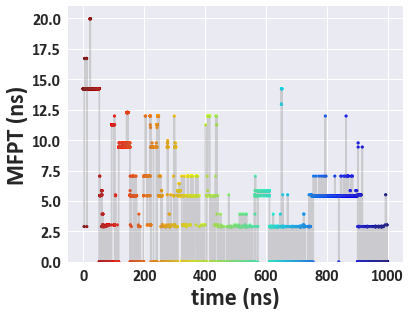

fit61_skip10_chain9


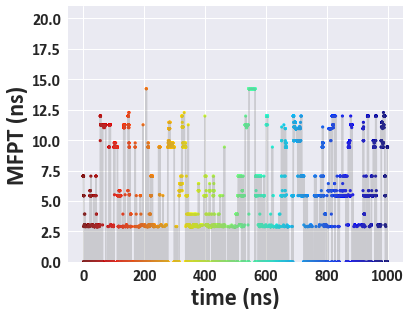

fit61_skip10_chain10


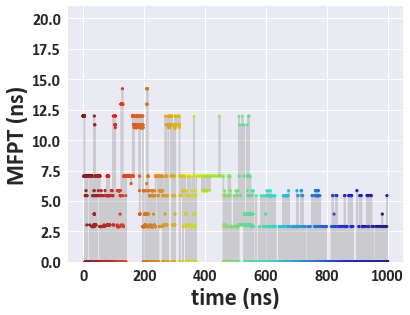

fit61_skip10_chain11


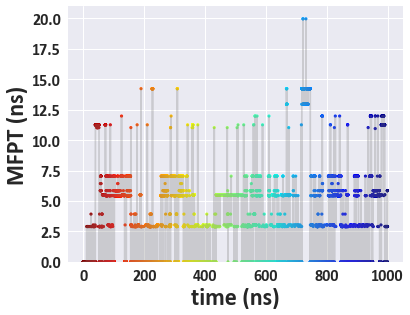

fit61_skip10_chain12


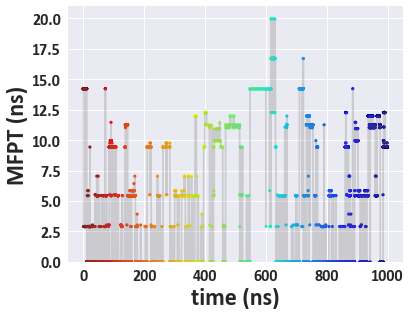

fit62_skip10_chain1


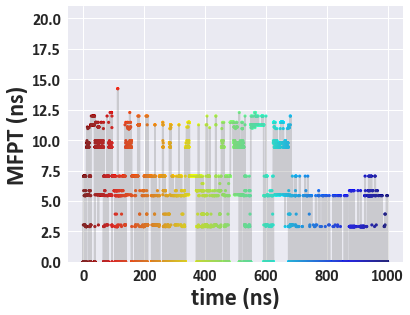

fit62_skip10_chain2


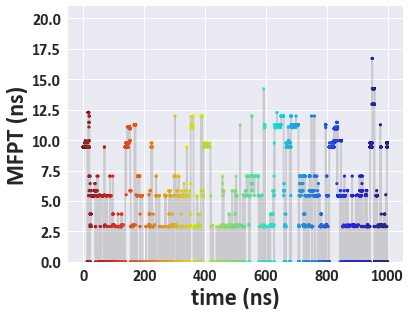

fit62_skip10_chain3


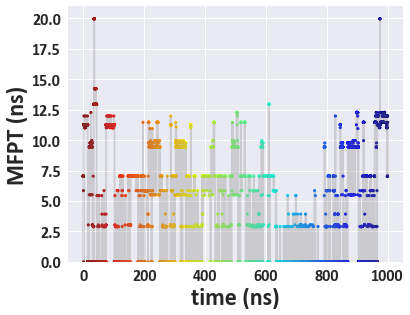

fit62_skip10_chain4


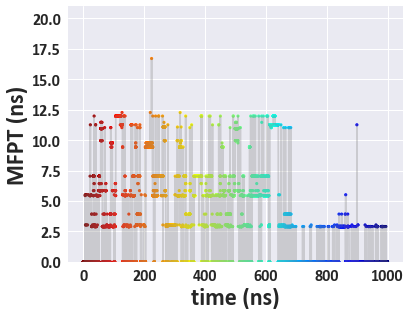

fit62_skip10_chain5


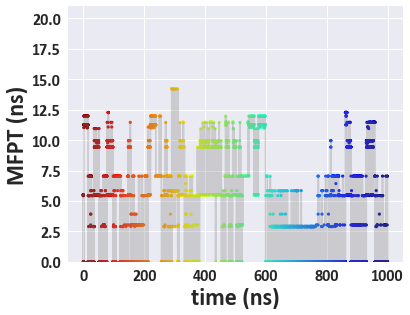

fit62_skip10_chain6


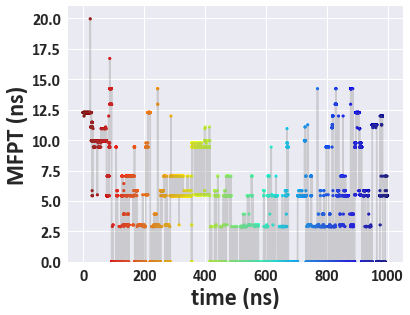

fit62_skip10_chain7


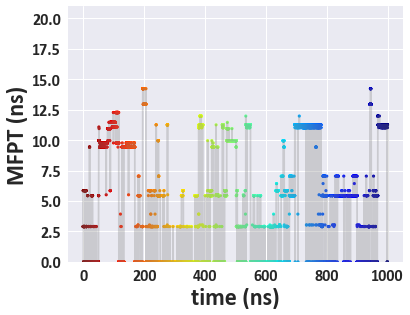

fit62_skip10_chain8


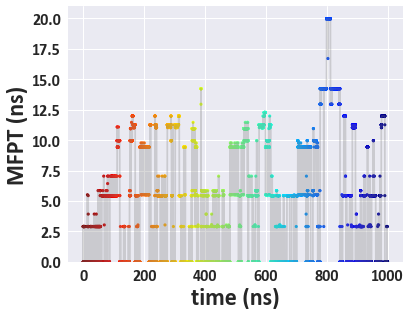

fit62_skip10_chain9


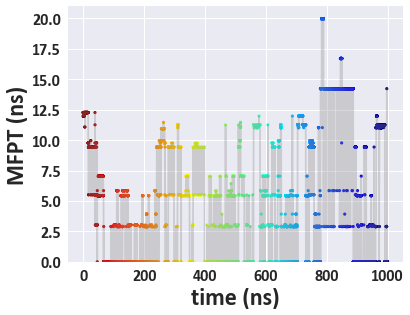

fit62_skip10_chain10


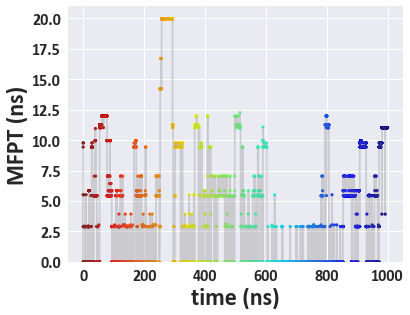

fit62_skip10_chain11


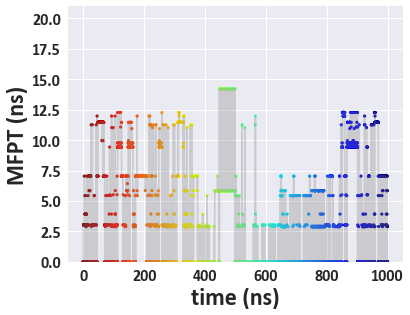

fit62_skip10_chain12


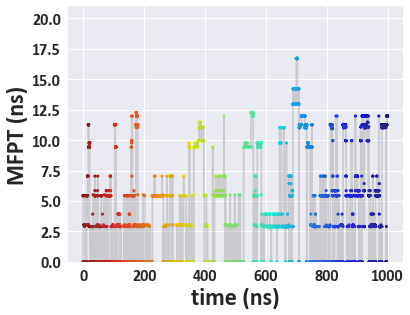

fit63_skip10_chain1


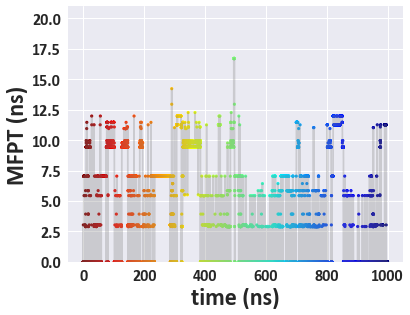

fit63_skip10_chain2


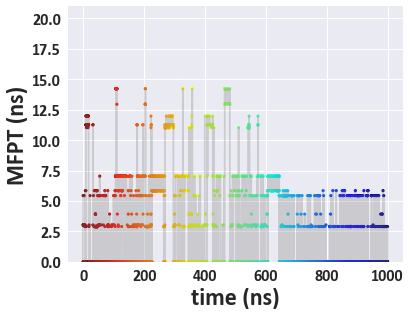

fit63_skip10_chain3


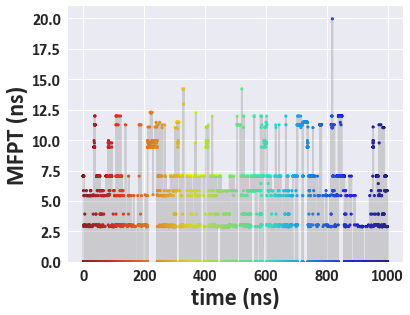

fit63_skip10_chain4


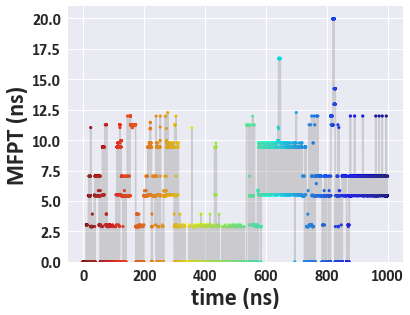

fit63_skip10_chain5


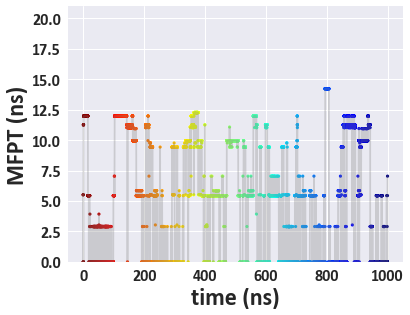

fit63_skip10_chain6


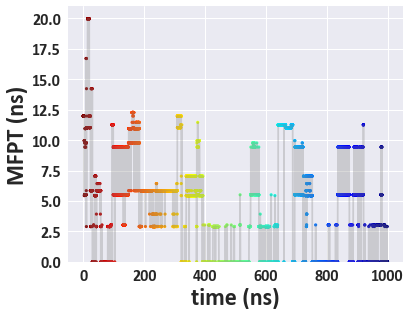

fit63_skip10_chain7


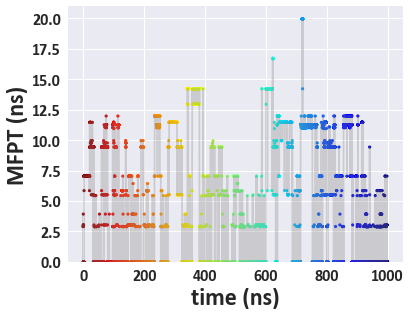

fit63_skip10_chain8


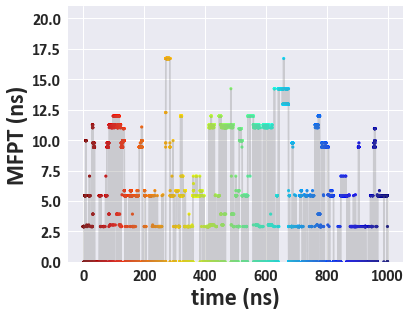

fit63_skip10_chain9


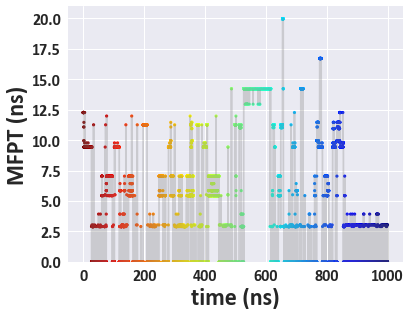

fit63_skip10_chain10


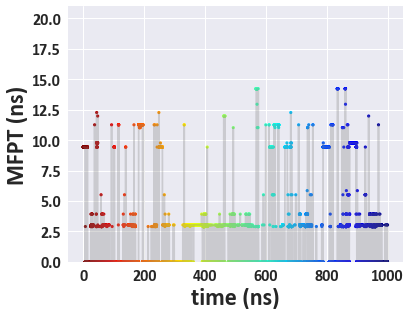

fit63_skip10_chain11


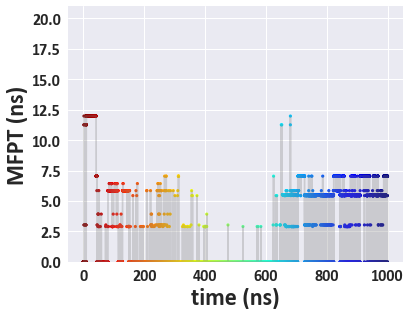

fit63_skip10_chain12


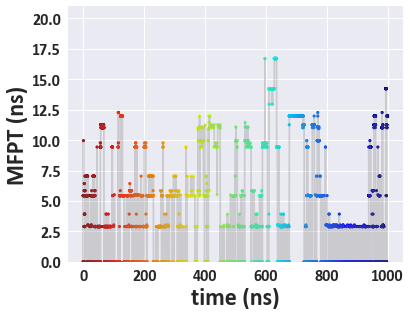

In [28]:
mfpt=[11.46 ,5.51 ,6.43 ,14.22 ,9.77 ,11.08 ,16.71 ,12.95 ,3.92 ,12.27 ,19.97 ,11.03 ,9.96 ,10.95 ,9.77 ,14.23 ,11.98 ,5.85 ,3.03 ,7.04 ,2.90 ,11.26 ,9.43 ,5.44 ,0.00 ]
for trj in range(54,64):
    for chain in range(1,13):
        tc='fit'+str(trj)+'_skip10_chain'+str(chain)
        print tc
        filename='/home/disk2/wdd/PDZ/12concentration/toHubMfpt25states/'+tc+'_macro_trajs.dat'
        xtcname='/home/disk2/wdd/PDZ/12concentration/trj/all/'+tc+'.xtc'
        wf=open(filename,'w')
        fitchain_xyz=dataset(xtcname,topology='/home/disk2/wdd/PDZ/charm36m/crystal.pdb',stride=1)
        fitchain_diheds = featurizer.fit_transform(fitchain_xyz)
        fitchain_scaled_diheds = scaler.fit_transform(fitchain_diheds)
        fitchain_tica_trajs = tica_model.transform(fitchain_scaled_diheds)
        fitchain_clustered_trajs = clusterer.transform(fitchain_tica_trajs)
        fitchain_macro_trajs = pcca.transform(fitchain_clustered_trajs)
        
        for i in fitchain_macro_trajs[0]:
            wf.write(str(i)+'\n')
        wf.close()
        time_step=0.1       #ns
        import pandas as pd
        import seaborn as sns
        sns.set(color_codes=True)
        import matplotlib.pyplot as plt
        import matplotlib.font_manager as font_manager
        font_path = '/home/disk2/wdd/msm/calibribold.ttf'
        font_prop = font_manager.FontProperties(fname=font_path, size=24)
        leg_prop = font_manager.FontProperties(fname=font_path, size=17)
        cmap = plt.cm.get_cmap("jet_r")
        
        fig, ax = plt.subplots(figsize=(6,4.7))
        data = np.loadtxt(filename)
        data_sort=[]
        for m in data:
            data_sort.append(mfpt[int(m)])
        filename2='/home/disk2/wdd/PDZ/12concentration/toHubMfpt25states/'+tc+'_macro_trajs_mfpt.dat'
        wf2=open(filename2,'w')
        for mm in data_sort:
            wf2.write(str(mm)+'\n')
        wf2.close()
        time = np.arange(len(data))*time_step
        ax.scatter(time,data_sort, c=np.arange(len(data)),cmap=cmap,lw = 0,s=10)
        ax.plot(time,data_sort,'gray',alpha=0.3)
        ax.set_ylabel('MFPT (ns)',fontproperties=font_prop)
        ax.set_xlabel('time (ns)',fontproperties=font_prop)
        plt.ylim(0,21)
        #ax.set_yticks(np.linspace(0,25,26))
        #ax.set_yticklabels(map_mfpt)
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(font_prop)
            label.set_fontsize(16)
        fig2name='/home/disk2/wdd/PDZ/12concentration/toHubMfpt25states/'+tc+"_macro_trajs_mfpt.png"
        plt.savefig(fig2name,dpi=600,bbox_inches='tight')
        plt.show()

In [6]:
def Qrange(x):
    return int(x*100.0)/100.0

In [8]:
cd /home/disk2/wdd/PDZ/12concentration/Q_heavyatoms

/home/disk2/wdd/PDZ/12concentration/Q_heavyatoms


In [30]:
QrangeCount={}
for i in np.arange(0.0,1.0,0.01):
    QrangeCount[str(i)]=[]
for trj in range(47,61):
    #print trj
    for chain in range(1,13):
        Qheavy=np.loadtxt('fit'+str(trj)+'_chain'+str(chain)+'_Q_heavyatoms.cs')
        macro_traj=np.loadtxt('/home/disk2/wdd/PDZ/12concentration/toHubMfpt25states/fit'+str(trj)+'_skip10_chain'+str(chain)+'_macro_trajs.dat')
        if trj in [20,30,32,36]:
            lenQh=10001
        else:
            lenQh=len(Qheavy)
        for num in range(lenQh):
            #print Qrange(Qheavy[num])
            QrangeCount[str(Qrange(Qheavy[num]))].append(macro_traj[num])
            #if Qrange(Qheavy[num])==0.600:
                #print str(trj)+'  '+str(chain)

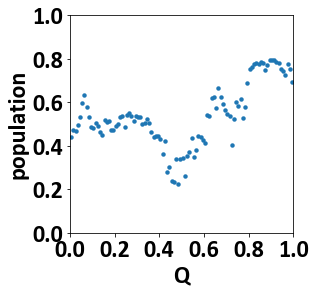

In [31]:
wf=open('population_Q100-47-61.cs','w')
for i in np.arange(0.00,1.00,0.01):
    popu=QrangeCount[str(i)].count(24)/(len(QrangeCount[str(i)])+0.0)
    #print popu
    wf.write(str(i+0.005)+'   '+str(popu)+'\n')
wf.close()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
data = np.loadtxt('population_Q100-47-61.cs')
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
#cmap = plt.cm.get_cmap("jet_r")
#cmap.set_over("white")
plt.scatter(data[:,0],data[:,1],lw = 0,s=20)
#plt.xlabel(r'rmsd ($^\circ$)',fontproperties=font_prop)
plt.xlabel(r'Q',fontproperties=font_prop)
plt.ylabel(r'population',fontproperties=font_prop)
plt.xlim(0,1)
plt.ylim(0,1)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
plt.savefig('population_Q100_47-61trj-.jpg',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()

In [11]:
allnum=0
for i in np.arange(0.0,1.0,0.01):
    allnum=len(QrangeCount[str(i)])+allnum
print allnum

8160756


In [22]:
QrangeCount_succeed={}
for i in np.arange(0.0,1.0,0.01):
    QrangeCount_succeed[str(i)]=[]
binding_succeed_infor=np.loadtxt('binding_succeed_information.cs')
for i in range(len(binding_succeed_infor)):
    trj=int(binding_succeed_infor[i][0])
    chain=int(binding_succeed_infor[i][1])
    suceed=int(binding_succeed_infor[i][2])
    if suceed==1:
        Qheavy=np.loadtxt('fit'+str(trj)+'_chain'+str(chain)+'_Q_heavyatoms.cs')
        macro_traj=np.loadtxt('/home/disk2/wdd/PDZ/12concentration/toHubMfpt25states/fit'+str(trj)+'_skip10_chain'+str(chain)+'_macro_trajs.dat')
        for num in range(len(Qheavy)):
            #print Qrange(Qheavy[num])
            QrangeCount_succeed[str(Qrange(Qheavy[num]))].append(macro_traj[num])

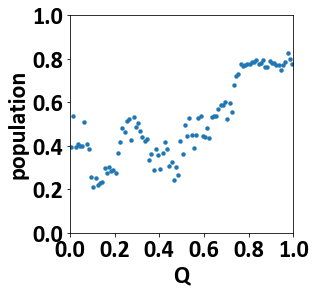

In [23]:
wf=open('population_Q100_succeed_selected.cs','w')
for i in np.arange(0.00,1.00,0.01):
    popu=QrangeCount_succeed[str(i)].count(24)/(len(QrangeCount_succeed[str(i)])+0.0)
    #print popu
    wf.write(str(i+0.005)+'   '+str(popu)+'\n')
wf.close()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
data = np.loadtxt('population_Q100_succeed_selected.cs')
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
#cmap = plt.cm.get_cmap("jet_r")
#cmap.set_over("white")
plt.scatter(data[:,0],data[:,1],lw = 0,s=20)
#plt.xlabel(r'rmsd ($^\circ$)',fontproperties=font_prop)
plt.xlabel(r'Q',fontproperties=font_prop)
plt.ylabel(r'population',fontproperties=font_prop)
plt.xlim(0,1)
plt.ylim(0,1)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
plt.savefig('population_Q100_64trj_succeed_selected-.jpg',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()

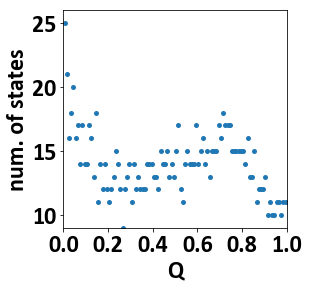

In [24]:
wf=open('num_Of_Conf_Q100_succeed_selected.cs','w')
for i in np.arange(0.00,1.00,0.01):
    #popu=QrangeCount[str(i)].count(24)/(len(QrangeCount[str(i)])+0.0)
    num=len(set(QrangeCount_succeed[str(i)]))
    #print QrangeCount[str(i)]
    wf.write(str(i+0.005)+'   '+str(num)+'\n')
wf.close()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
data = np.loadtxt('num_Of_Conf_Q100_succeed_selected.cs')
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
#cmap = plt.cm.get_cmap("jet_r")
#cmap.set_over("white")
plt.scatter(data[:,0],data[:,1],lw = 0,s=25)
#plt.xlabel(r'rmsd ($^\circ$)',fontproperties=font_prop)
plt.xlabel(r'Q',fontproperties=font_prop)
plt.ylabel(r'num. of states',fontproperties=font_prop)
plt.xlim(0,1)
plt.ylim(9,26)
ax.set_yticks(np.linspace(10,25,4))
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
plt.savefig('num_Q100_64trj-succeed_selected.jpg',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()

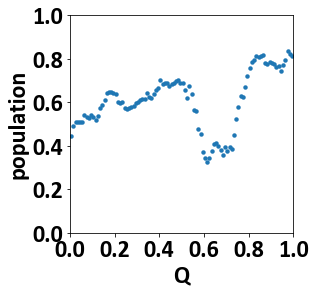

In [26]:
wf=open('population_Q100-63.cs','w')
for i in np.arange(0.00,1.00,0.01):
    popu=QrangeCount[str(i)].count(24)/(len(QrangeCount[str(i)])+0.0)
    #print popu
    wf.write(str(i+0.005)+'   '+str(popu)+'\n')
wf.close()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
data = np.loadtxt('population_Q100-63.cs')
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
#cmap = plt.cm.get_cmap("jet_r")
#cmap.set_over("white")
plt.scatter(data[:,0],data[:,1],lw = 0,s=20)
#plt.xlabel(r'rmsd ($^\circ$)',fontproperties=font_prop)
plt.xlabel(r'Q',fontproperties=font_prop)
plt.ylabel(r'population',fontproperties=font_prop)
plt.xlim(0,1)
plt.ylim(0,1)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
plt.savefig('population_Q100_63trj-.jpg',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()

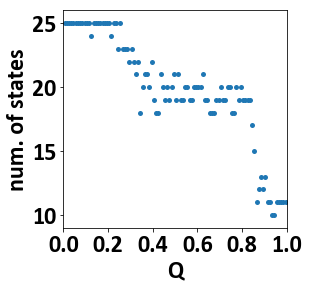

In [20]:
wf=open('num_Of_Conf_Q100.cs','w')
for i in np.arange(0.00,1.00,0.01):
    #popu=QrangeCount[str(i)].count(24)/(len(QrangeCount[str(i)])+0.0)
    num=len(set(QrangeCount[str(i)]))
    #print QrangeCount[str(i)]
    wf.write(str(i+0.005)+'   '+str(num)+'\n')
wf.close()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
data = np.loadtxt('num_Of_Conf_Q100.cs')
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
#cmap = plt.cm.get_cmap("jet_r")
#cmap.set_over("white")
plt.scatter(data[:,0],data[:,1],lw = 0,s=25)
#plt.xlabel(r'rmsd ($^\circ$)',fontproperties=font_prop)
plt.xlabel(r'Q',fontproperties=font_prop)
plt.ylabel(r'num. of states',fontproperties=font_prop)
plt.xlim(0,1)
plt.ylim(9,26)
ax.set_yticks(np.linspace(10,25,4))
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
plt.savefig('num_Q100_64trj-.jpg',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()

In [111]:
QrangeCountT={}
for i in np.arange(0.0,1.0,0.01):
    QrangeCountT[str(i)]=[]
for trj in range(1,53):
    print trj
    for chain in range(1,13):
        Qheavy=np.loadtxt('fit'+str(trj)+'_chain'+str(chain)+'_Q_heavyatoms.cs')
        macro_traj=np.loadtxt('/home/disk2/wdd/PDZ/12concentration/toHubMfpt/fit'+str(trj)+'_skip10_chain'+str(chain)+'_macro_trajs_mfpt.dat')
        for num in range(len(Qheavy)):
            #print Qrange(Qheavy[num])
            QrangeCountT[str(Qrange(Qheavy[num]))].append(macro_traj[num])
wf=open('mfpt_Q100.cs','w')
for i in np.arange(0.00,1.00,0.01):
    mfpt=np.mean(QrangeCountT[str(i)])
    #print popu
    wf.write(str(i+0.005)+'   '+str(mfpt)+'\n')
wf.close()

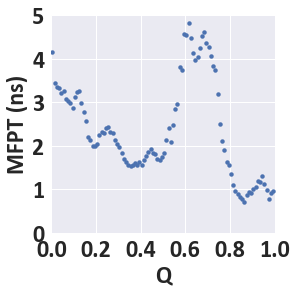

In [115]:
data = np.loadtxt('mfpt_Q100.cs')
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
#cmap = plt.cm.get_cmap("jet_r")
#cmap.set_over("white")
plt.scatter(data[:,0],data[:,1],lw = 0,s=20)
#plt.xlabel(r'rmsd ($^\circ$)',fontproperties=font_prop)
plt.xlabel(r'Q',fontproperties=font_prop)
plt.ylabel(r'MFPT (ns)',fontproperties=font_prop)
plt.xlim(0,1)
plt.ylim(0,5)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
plt.savefig('mfpt_Q100.jpg',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()

In [118]:
QrangeCount_s={}
for i in np.arange(0.0,1.0,0.01):
    QrangeCount_s[str(i)]=[]
for trj in range(1,53):
    print trj
    for chain in range(1,13):
        Qheavy=np.loadtxt('fit'+str(trj)+'_chain'+str(chain)+'_Q_heavyatoms.cs')
        macro_traj=np.loadtxt('/home/disk2/wdd/PDZ/12concentration/toHubMfpt/fit'+str(trj)+'_skip10_chain'+str(chain)+'_macro_trajs.dat')
        for num in range(10001):
            #print Qrange(Qheavy[num])
            QrangeCount_s[str(Qrange(Qheavy[num]))].append(macro_traj[num])
wf=open('population_Q100_s.cs','w')
for i in np.arange(0.00,1.00,0.01):
    popu=QrangeCount_s[str(i)].count(24)/(len(QrangeCount_s[str(i)])+0.0)
    #print popu
    wf.write(str(i+0.005)+'   '+str(popu)+'\n')
wf.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


In [124]:
def Qrange1(x):
    return int(x*10.0)/10.0
QrangeCount_1={}
for i in np.arange(0.0,1.0,0.1):
    QrangeCount_1[str(i)]=[]
for trj in range(47,48):
    print trj
    for chain in range(7,8):
        Qheavy=np.loadtxt('fit'+str(trj)+'_chain'+str(chain)+'_Q_heavyatoms.cs')
        macro_traj=np.loadtxt('/home/disk2/wdd/PDZ/12concentration/toHubMfpt/fit'+str(trj)+'_skip10_chain'+str(chain)+'_macro_trajs.dat')
        for num in range(10001):
            #print Qrange(Qheavy[num])
            QrangeCount_1[str(Qrange1(Qheavy[num]))].append(macro_traj[num])
wf=open('population_Q100_47.cs','w')
for i in np.arange(0.0,1.0,0.1):
    popu=QrangeCount_1[str(i)].count(24)/(len(QrangeCount_1[str(i)])+0.0)
    #print popu
    wf.write(str(i+0.05)+'   '+str(popu)+'\n')
wf.close()

47


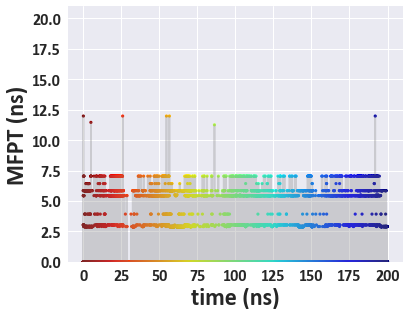

In [137]:
mfpt=[11.46 ,5.51 ,6.43 ,14.22 ,9.77 ,11.08 ,16.71 ,12.95 ,3.92 ,12.27 ,19.97 ,11.03 ,9.96 ,10.95 ,9.77 ,14.23 ,11.98 ,5.85 ,3.03 ,7.04 ,2.90 ,11.26 ,9.43 ,5.44 ,0.00 ]
filename='/home/disk2/wdd/PDZ/complex/charmm36/crystal_macro_trajs.dat'
xtcname='/home/disk2/wdd/PDZ/complex/charmm36/chainB_fit.xtc'
wf=open(filename,'w')
fitchain_xyz=dataset(xtcname,topology='/home/disk2/wdd/PDZ/charm36m/crystal.pdb',stride=1)
fitchain_diheds = featurizer.fit_transform(fitchain_xyz)
fitchain_scaled_diheds = scaler.fit_transform(fitchain_diheds)
fitchain_tica_trajs = tica_model.transform(fitchain_scaled_diheds)
fitchain_clustered_trajs = clusterer.transform(fitchain_tica_trajs)
fitchain_macro_trajs = pcca.transform(fitchain_clustered_trajs)

for i in fitchain_macro_trajs[0]:
    wf.write(str(i)+'\n')
wf.close()
time_step=0.01       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
cmap = plt.cm.get_cmap("jet_r")

fig, ax = plt.subplots(figsize=(6,4.7))
data = np.loadtxt(filename)
data_sort=[]
for m in data:
    data_sort.append(mfpt[int(m)])
filename2='/home/disk2/wdd/PDZ/complex/charmm36/crystal_macro_trajs_mfpt.dat'
wf2=open(filename2,'w')
for mm in data_sort:
    wf2.write(str(mm)+'\n')
wf2.close()
time = np.arange(len(data))*time_step
ax.scatter(time,data_sort, c=np.arange(len(data)),cmap=cmap,lw = 0,s=10)
ax.plot(time,data_sort,'gray',alpha=0.3)
ax.set_ylabel('MFPT (ns)',fontproperties=font_prop)
ax.set_xlabel('time (ns)',fontproperties=font_prop)
plt.ylim(0,21)
#ax.set_yticks(np.linspace(0,25,26))
#ax.set_yticklabels(map_mfpt)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
fig2name="/home/disk2/wdd/PDZ/complex/charmm36/crystal_macro_trajs_mfpt.png"
plt.savefig(fig2name,dpi=600,bbox_inches='tight')
plt.show()

In [136]:
np.sum(data==24)/(len(data)+0.0)

0.70036498175091244

In [1]:
len(data)

NameError: name 'data' is not defined

In [21]:
pwd

u'/home/disk2/wdd/PDZ/12concentration/Q_heavyatoms'